In [1]:
import pandas as pd
import matplotlib as pyplot
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler


In [2]:
file_path = r"C:\Users\Estudiante\Desktop\tecnicatura\aprendizaje automático 2024\ENFR2018_baseusuario\data\external\Base usuario.txt"

ents = pd.read_table(file_path, delimiter="|")
   


In [3]:
print(ents)

               id  cod_provincia  region  tamanio_aglomerado  aglomerado  \
0         1128639              2       1                   1           1   
1         1709939              2       1                   1           1   
2         6874130              2       1                   1           1   
3        10319375              2       1                   1           1   
4        11140857              2       1                   1           1   
...           ...            ...     ...                 ...         ...   
29219  2092256226             94       6                   4           9   
29220  2097771079             94       6                   4           9   
29221  2101464264             94       6                   4           9   
29222  2116612011             94       6                   4           9   
29223  2134624977             94       6                   4           9   

       localidades_150  submuestra  bhcv01  bhcv02  bhcv03  ...  \
0                   

In [4]:
print(ents.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29224 entries, 0 to 29223
Columns: 287 entries, id to wf3p
dtypes: float64(186), int64(101)
memory usage: 64.0 MB
None


In [5]:
filtrado_por_provincia = ents.loc[ents["cod_provincia"].isin([94])]

In [6]:
print(filtrado_por_provincia)

               id  cod_provincia  region  tamanio_aglomerado  aglomerado  \
28903     7411356             94       6                   4           9   
28904    11724781             94       6                   4           9   
28905    14809972             94       6                   4           9   
28906    19436879             94       6                   4           9   
28907    27291858             94       6                   4           9   
...           ...            ...     ...                 ...         ...   
29219  2092256226             94       6                   4           9   
29220  2097771079             94       6                   4           9   
29221  2101464264             94       6                   4           9   
29222  2116612011             94       6                   4           9   
29223  2134624977             94       6                   4           9   

       localidades_150  submuestra  bhcv01  bhcv02  bhcv03  ...  \
28903               

In [7]:
columns_name=filtrado_por_provincia.columns
print(columns_name)

Index(['id', 'cod_provincia', 'region', 'tamanio_aglomerado', 'aglomerado',
       'localidades_150', 'submuestra', 'bhcv01', 'bhcv02', 'bhcv03',
       ...
       'glucemia_elevada', 'prevalencia_glucemia_elevada_combinada',
       'findrisc', 'bimq06', 'bimq06_01', 'colesterol_elevado',
       'prevalencia_colesterol_combinada', 'wf1p', 'wf2p', 'wf3p'],
      dtype='object', length=287)


In [8]:
filtrado_por_provincia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 28903 to 29223
Columns: 287 entries, id to wf3p
dtypes: float64(186), int64(101)
memory usage: 722.2 KB


In [9]:
filtrado_por_provincia.describe()

,id,cod_provincia,region,tamanio_aglomerado,aglomerado,localidades_150,submuestra,bhcv01,bhcv02,bhcv03,...,glucemia_elevada,prevalencia_glucemia_elevada_combinada,findrisc,bimq06,bimq06_01,colesterol_elevado,prevalencia_colesterol_combinada,wf1p,wf2p,wf3p
count,3.210000e+02,321.0,321.0,321.0,321.0,321.0,321.000000,321.000000,321.000000,321.000000,...,0.0,0.0,151.000000,0.0,0.0,0.0,0.0,321.000000,321.000000,321.0
mean,1.046839e+09,94.0,6.0,4.0,9.0,0.0,0.750779,1.576324,3.330218,1.059190,...,NaN,NaN,2.317881,NaN,NaN,NaN,NaN,344.461059,344.411215,0.0
std,6.143385e+08,0.0,0.0,0.0,0.0,0.0,0.433237,0.908949,1.358994,0.334829,...,NaN,NaN,1.207592,NaN,NaN,NaN,NaN,269.461325,437.883253,0.0
min,7.411356e+06,94.0,6.0,4.0,9.0,0.0,0.000000,1.000000,1.000000,1.000000,...,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,62.000000,0.000000,0.0
25%,5.293222e+08,94.0,6.0,4.0,9.0,0.0,1.000000,1.000000,2.000000,1.000000,...,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,180.000000,0.000000,0.0
50%,1.027767e+09,94.0,6.0,4.0,9.0,0.0,1.000000,1.000000,3.000000,1.000000,...,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,269.000000,216.000000,0.0
75%,1.595135e+09,94.0,6.0,4.0,9.0,0.0,1.000000,3.000000,4.000000,1.000000,...,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,421.000000,540.000000,0.0
max,2.134625e+09,94.0,6.0,4.0,9.0,0.0,1.000000,4.000000,10.000000,4.000000,...,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,2404.000000,2383.000000,0.0


In [10]:
nulos_por_columna = filtrado_por_provincia.isnull().sum()
print(nulos_por_columna)

id                                    0
cod_provincia                         0
region                                0
tamanio_aglomerado                    0
aglomerado                            0
                                   ... 
colesterol_elevado                  321
prevalencia_colesterol_combinada    321
wf1p                                  0
wf2p                                  0
wf3p                                  0
Length: 287, dtype: int64


In [11]:
#se filtran las variables que tienen nulos para poder elegir las que se van a utilizar
columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0].index.tolist()
print(columnas_con_nulos)

['bhcv10', 'bhcv11', 'bhho01', 'bhih01_02', 'rango_ingreso', 'imputado', 'bhch10_01_j', 'bhch10_02_j', 'bhch10_03_j', 'bhch10_04_j', 'bhch10_05_j', 'bhch10_06_j', 'bhch10_99_j', 'bhsl02', 'bhsl03', 'bhsl04', 'bhsl05', 'bhsl06', 'bhch10_01', 'bhch10_02', 'bhch10_03', 'bhch10_04', 'bhch10_05', 'bhch10_06', 'bhch10_99', 'bisl02', 'bisl03', 'bisl04', 'bisl05', 'bisl06', 'biaf02_m', 'biaf02_99', 'biaf04_m', 'biaf04_99', 'biaf06_m', 'biaf06_99', 'biaf07_m', 'biaf07_99', 'biaf08', 'biaf09', 'biaf10_01', 'biaf10_02', 'biaf10_03', 'biaf10_04', 'nivel_actividad_fisica', 'bita02', 'bita02_99', 'bita03', 'bita04', 'bita04_01', 'bita04_02', 'bita05', 'bita06_a', 'bita06_b', 'bita06_b_99', 'bita06_c', 'bita06_d', 'bita07', 'bita07_99', 'bita08', 'bita15', 'ta_paquete_y_armado', 'ta_dejar_fumar', 'hta_nofumadores', 'ta_perc_publicidad', 'ta_percepcion_riesgo', 'imagenes_tabaco', 'biha02', 'biha04', 'biha05_01', 'biha05_02', 'biha06', 'biha06_99', 'biha07', 'biha08', 'biha09', 'biha10', 'biha11', 'bih

In [12]:
nulos_por_columna = filtrado_por_provincia.isnull().sum()

# se filtran las columnas que no tienen nulos para poder evaluar las variables a seleccionar
columnas_sin_nulos = nulos_por_columna[nulos_por_columna == 0].index.tolist()

print("Columnas sin valores nulos:")
print(columnas_sin_nulos)


Columnas sin valores nulos:
['id', 'cod_provincia', 'region', 'tamanio_aglomerado', 'aglomerado', 'localidades_150', 'submuestra', 'bhcv01', 'bhcv02', 'bhcv03', 'bhcv04', 'bhcv05', 'bhcv06', 'bhcv07', 'bhcv08', 'bhcv09', 'bhho02', 'bhho03', 'cant_componentes', 'miembros_18', 'tipo_hogar', 'bhih01', 'quintil_uc', 'bhih03', 'bhch03_j', 'bhch04_j', 'rango_edad_j', 'bhch05_j', 'nivel_instruccion_j', 'nivel_instruccion_agrupado_j', 'cobertura_salud_j', 'bhsl01', 'condicion_actividad_j', 'bhch02', 'bhch03', 'bhch04', 'rango_edad', 'bhch05', 'nivel_instruccion', 'nivel_instruccion_agrupado', 'cobertura_salud', 'bisl01', 'condicion_actividad', 'bisg01', 'bisg02', 'bisg03', 'bisg04', 'bisg05', 'bisg06', 'biaf01', 'biaf03', 'biaf05', 'barreras_actividad_fisica', 'bita01', 'bita09_01', 'bita09_02', 'bita09_03', 'bita09_04', 'bita09_05', 'bita09_06', 'bita10_01', 'bita10_02', 'bita10_03', 'bita10_04', 'bita10_05', 'bita10_06', 'bita11', 'bita12', 'bita13', 'bita14', 'bita16', 'consumo_tabaco_100',

In [13]:
nulos_prevalencia_hipertension =filtrado_por_provincia['prevalencia_hipertension'].isnull().sum()
print(nulos_prevalencia_hipertension)

14


In [14]:
nulos_prevalencia_colesterol =filtrado_por_provincia['prevalencia_colesterol'].isnull().sum()
print(nulos_prevalencia_colesterol)

60


In [15]:
nulos_bial05 =filtrado_por_provincia['bial05'].isnull().sum()
print(nulos_bial05)

2


In [16]:
nulos_bial03 =filtrado_por_provincia['bial03'].isnull().sum()
print(nulos_bial03)

6


In [17]:
nulos_findrisc =filtrado_por_provincia['findrisc'].isnull().sum()
print(nulos_findrisc)

170


In [18]:
nulos_ta_elevada =filtrado_por_provincia['ta_elevada'].isnull().sum()
print(nulos_ta_elevada)

133


In [19]:
#selecciono las variables relevantes para el proyecto(aunque se podrían incluir otras pero tienen muchos valores nulos para poder imputarlas)
variables_relevantes = [
    'prevalencia_diabetes', 'prevalencia_colesterol', 'findrisc',
    'ta_elevada', 'bidi01', 'bial04', 'bial03',
    'bial05', 'biaf03', 'bisg06', 'bisg04', 'bita10_06','rango_edad','bhch04','bisg01','bisg02','bisg03','biaf01','biha03',
    'bipc01','bico03','consumo_regular_riesgo'
]
filtrado_por_provincia=filtrado_por_provincia[variables_relevantes]
print(filtrado_por_provincia)

       prevalencia_diabetes  prevalencia_colesterol  findrisc  ta_elevada  \
28903                     2                     2.0       2.0         2.0   
28904                     1                     2.0       NaN         NaN   
28905                     2                     2.0       1.0         2.0   
28906                     2                     2.0       3.0         1.0   
28907                     2                     1.0       3.0         2.0   
...                     ...                     ...       ...         ...   
29219                     2                     2.0       NaN         NaN   
29220                     2                     1.0       3.0         2.0   
29221                     2                     1.0       3.0         1.0   
29222                     1                     2.0       NaN         NaN   
29223                     1                     2.0       NaN         1.0   

       bidi01  bial04  bial03  bial05  biaf03  bisg06  ...  rango_edad  \
2

In [20]:
#elimino las filas que tienen valores nulos
filtrado_por_provincia= filtrado_por_provincia.dropna(axis='index')
print(filtrado_por_provincia)

       prevalencia_diabetes  prevalencia_colesterol  findrisc  ta_elevada  \
28906                     2                     2.0       3.0         1.0   
28907                     2                     1.0       3.0         2.0   
28908                     2                     2.0       2.0         2.0   
28911                     1                     2.0       5.0         1.0   
28914                     2                     2.0       2.0         2.0   
...                     ...                     ...       ...         ...   
29205                     2                     2.0       2.0         2.0   
29212                     2                     2.0       1.0         2.0   
29215                     2                     2.0       4.0         2.0   
29220                     2                     1.0       3.0         2.0   
29221                     2                     1.0       3.0         1.0   

       bidi01  bial04  bial03  bial05  biaf03  bisg06  ...  rango_edad  \
2

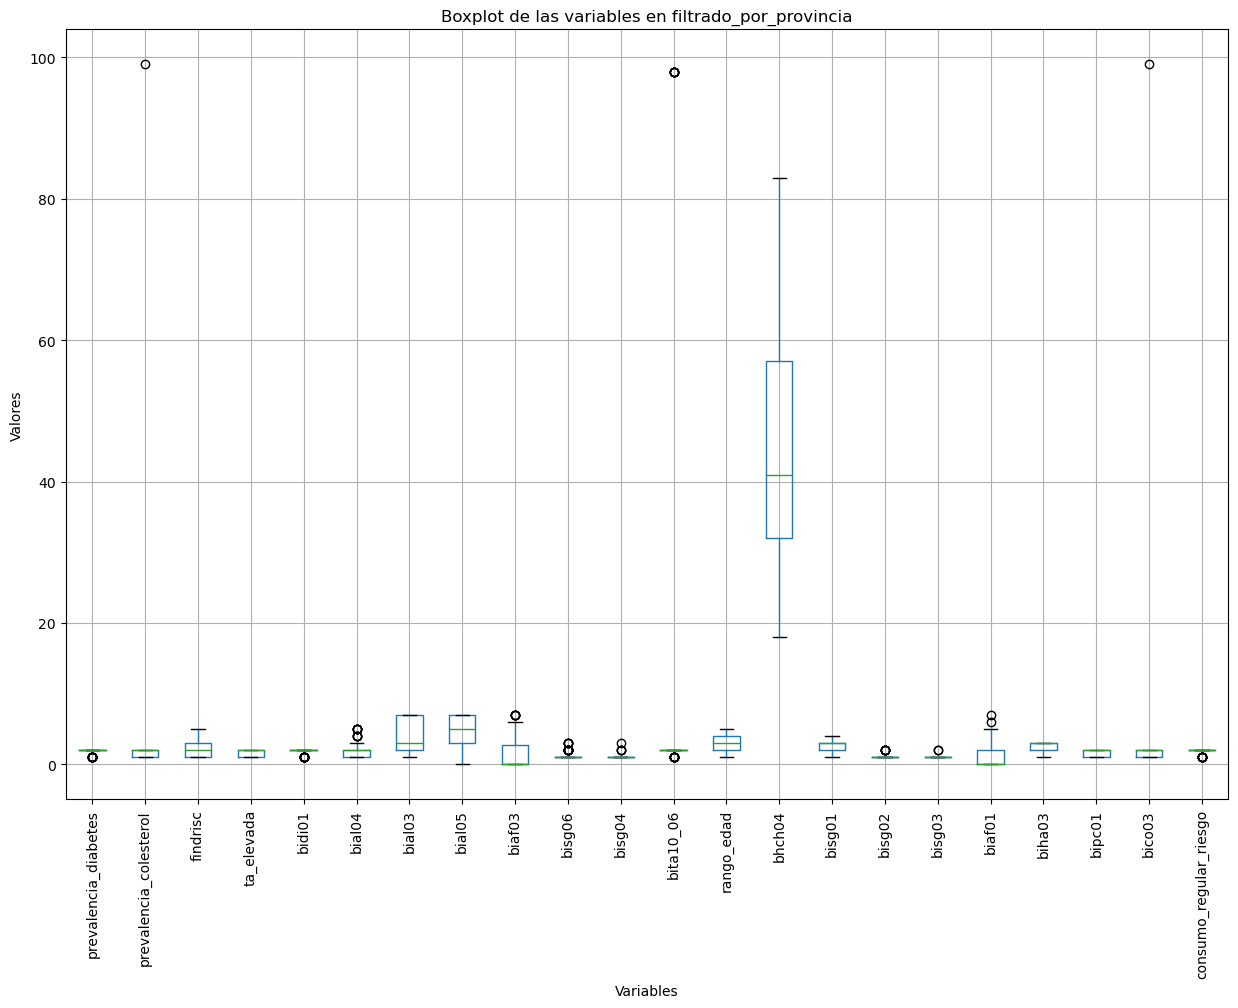

In [21]:
# realizo un gráfico de cajas
plt.figure(figsize=(15, 10))
filtrado_por_provincia.boxplot(rot=90)
plt.title("Boxplot de las variables en filtrado_por_provincia")
plt.xlabel("Variables")
plt.ylabel("Valores")
plt.show()

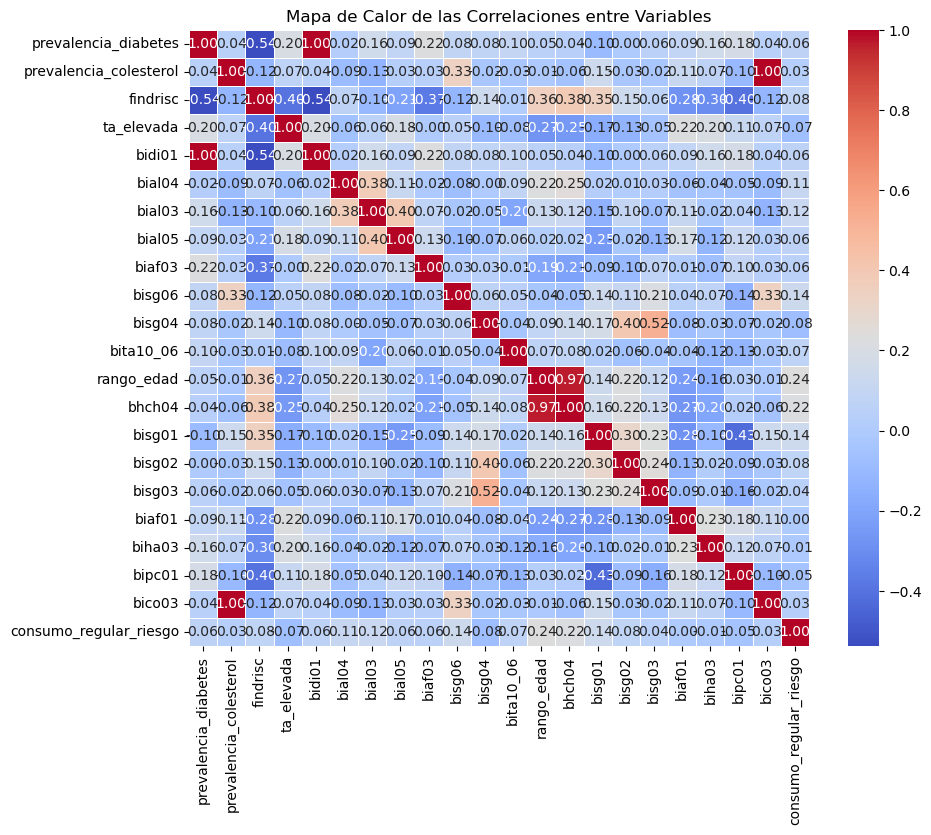

In [22]:
# Calcular la matriz de correlación
corr_matrix =filtrado_por_provincia[variables_relevantes].corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Mapa de Calor de las Correlaciones entre Variables')
plt.show()

In [23]:
X = filtrado_por_provincia

# Separar características (X) y la variable objetivo (y)
y = X['prevalencia_diabetes']
X = X.drop(columns=['prevalencia_diabetes'])

# Estandarice los datos utilizando MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Verifique la transformación
print(X_scaled.describe())

# Dividi los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

       prevalencia_colesterol    findrisc  ta_elevada      bidi01      bial04  \
count              110.000000  110.000000  110.000000  110.000000  110.000000   
mean                 0.015399    0.361364    0.663636    0.854545    0.202273   
std                  0.094868    0.311453    0.474627    0.354172    0.256778   
min                  0.000000    0.000000    0.000000    0.000000    0.000000   
25%                  0.000000    0.000000    0.000000    1.000000    0.000000   
50%                  0.010204    0.250000    1.000000    1.000000    0.250000   
75%                  0.010204    0.500000    1.000000    1.000000    0.250000   
max                  1.000000    1.000000    1.000000    1.000000    1.000000   

           bial03      bial05      biaf03      bisg06      bisg04  ...  \
count  110.000000  110.000000  110.000000  110.000000  110.000000  ...   
mean     0.545455    0.653247    0.200000    0.113636    0.022727  ...   
std      0.392273    0.304408    0.303015    0.2

In [24]:
# Función para entrenar y evaluar modelos
def entrenar_y_evaluar(modelo, X_train, X_test, y_train, y_test):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Modelo: {modelo.__class__.__name__}")
    print(f"Error cuadrático medio (MSE): {mse}")
    print(f"Coeficiente de determinación (R^2): {r2}")
    print("\n")

# Lista de modelos a probar
modelos = [
    LinearRegression(),
    DecisionTreeRegressor(),
    SVR(),
]

# Entrenar y evaluar cada modelo
for modelo in modelos:
    entrenar_y_evaluar(modelo, X_train, X_test, y_train, y_test)

Modelo: LinearRegression
Error cuadrático medio (MSE): 3.65296385088139e-31
Coeficiente de determinación (R^2): 1.0


Modelo: DecisionTreeRegressor
Error cuadrático medio (MSE): 0.0
Coeficiente de determinación (R^2): 1.0


Modelo: SVR
Error cuadrático medio (MSE): 0.011486195530000362
Coeficiente de determinación (R^2): 0.9106538076273543




Ajuste de hiperparámetros

In [41]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [42]:
param_grid_svr = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}
model_svr = SVR()
grid_search_svr = GridSearchCV(estimator=model_svr, param_grid=param_grid_svr, cv=5, scoring='neg_mean_squared_error')

In [43]:
# Ajustar el modelo de SVR
grid_search_svr.fit(X_train, y_train)
best_params_svr = grid_search_svr.best_params_
best_score_svr = grid_search_svr.best_score_

print(f"Mejores hiperparámetros para SVR: {best_params_svr}")
print(f"Mejor puntuación para SVR: {best_score_svr}")

Mejores hiperparámetros para SVR: {'C': 100, 'gamma': 'auto', 'kernel': 'sigmoid'}
Mejor puntuación para SVR: -0.004247614790674276


In [44]:
# SVR con mejores hiperparámetros
best_model_svr = grid_search_svr.best_estimator_
y_pred_svr = best_model_svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR - MSE: {mse_svr}, R^2: {r2_svr}")

SVR - MSE: 0.0038659435738492656, R^2: 0.962631492912126


In [25]:
X = filtrado_por_provincia

# Separar características (X) y la variable objetivo (y)
y = X['findrisc']
X = X.drop(columns=['findrisc'])

# Estandarice los datos utilizando MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Verifique la transformación
print(X_scaled.describe())

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

       prevalencia_diabetes  prevalencia_colesterol  ta_elevada      bidi01  \
count            110.000000              110.000000  110.000000  110.000000   
mean               0.854545                0.015399    0.663636    0.854545   
std                0.354172                0.094868    0.474627    0.354172   
min                0.000000                0.000000    0.000000    0.000000   
25%                1.000000                0.000000    0.000000    1.000000   
50%                1.000000                0.010204    1.000000    1.000000   
75%                1.000000                0.010204    1.000000    1.000000   
max                1.000000                1.000000    1.000000    1.000000   

           bial04      bial03      bial05      biaf03      bisg06      bisg04  \
count  110.000000  110.000000  110.000000  110.000000  110.000000  110.000000   
mean     0.202273    0.545455    0.653247    0.200000    0.113636    0.022727   
std      0.256778    0.392273    0.304408    

In [26]:
# Función para entrenar y evaluar modelos
def entrenar_y_evaluar(modelo, X_train, X_test, y_train, y_test):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Modelo: {modelo.__class__.__name__}")
    print(f"Error cuadrático medio (MSE): {mse}")
    print(f"Coeficiente de determinación (R^2): {r2}")
    print("\n")

# Lista de modelos a probar
modelos = [
    LinearRegression(),
    DecisionTreeRegressor(),
    SVR(),
]

# Entrenar y evaluar cada modelo
for modelo in modelos:
    entrenar_y_evaluar(modelo, X_train, X_test, y_train, y_test)

Modelo: LinearRegression
Error cuadrático medio (MSE): 0.6964197080816318
Coeficiente de determinación (R^2): 0.43905246886028326


Modelo: DecisionTreeRegressor
Error cuadrático medio (MSE): 2.090909090909091
Coeficiente de determinación (R^2): -0.6841715976331362


Modelo: SVR
Error cuadrático medio (MSE): 0.5995618596581396
Coeficiente de determinación (R^2): 0.5170688867102707




Realizaré los mismos procesos de evaluar la prevalencia de diabetes pero con datos ampliados de las provincias que tienen similar condiciones climáticas, para ver si con mayor cantidad de datos se puede disminuir cualquier ruido y mejorar el modelo.

In [34]:
filtrado_patagonia = ents.loc[ents["cod_provincia"].isin([94,78,62,26,58])]
print(filtrado_patagonia)

               id  cod_provincia  region  tamanio_aglomerado  aglomerado  \
25209     4803669             26       6                   4           9   
25210     4813427             26       6                   3           9   
25211     5887426             26       6                   4           9   
25212    10446836             26       6                   4           9   
25213    10721862             26       6                   3           9   
...           ...            ...     ...                 ...         ...   
29219  2092256226             94       6                   4           9   
29220  2097771079             94       6                   4           9   
29221  2101464264             94       6                   4           9   
29222  2116612011             94       6                   4           9   
29223  2134624977             94       6                   4           9   

       localidades_150  submuestra  bhcv01  bhcv02  bhcv03  ...  \
25209               

In [35]:
filtrado_patagonia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4015 entries, 25209 to 29223
Columns: 287 entries, id to wf3p
dtypes: float64(186), int64(101)
memory usage: 8.8 MB


In [36]:
#selecciono las variables relevantes para el proyecto(aunque se podrían incluir otras pero tienen muchos valores nulos para poder imputarlas)
variables_relevantes = [
    'prevalencia_diabetes', 'prevalencia_colesterol', 'findrisc',
    'ta_elevada', 'bidi01', 'bial04', 'bial03',
    'bial05', 'biaf03', 'bisg06', 'bisg04', 'bita10_06','rango_edad','bhch04','bisg01','bisg02','bisg03','biaf01','biha03',
    'bipc01','bico03','consumo_regular_riesgo'
]
filtrado_patagonia=filtrado_patagonia[variables_relevantes]
print(filtrado_patagonia)

       prevalencia_diabetes  prevalencia_colesterol  findrisc  ta_elevada  \
25209                     2                     NaN       2.0         1.0   
25210                     2                     2.0       NaN         NaN   
25211                     2                     1.0       4.0         2.0   
25212                     2                     NaN       NaN         2.0   
25213                     1                     1.0       NaN         NaN   
...                     ...                     ...       ...         ...   
29219                     2                     2.0       NaN         NaN   
29220                     2                     1.0       3.0         2.0   
29221                     2                     1.0       3.0         1.0   
29222                     1                     2.0       NaN         NaN   
29223                     1                     2.0       NaN         1.0   

       bidi01  bial04  bial03  bial05  biaf03  bisg06  ...  rango_edad  \
2

In [37]:
#elimino las filas que tienen valores nulos
filtrado_patagonia= filtrado_patagonia.dropna(axis='index')
print(filtrado_patagonia)

       prevalencia_diabetes  prevalencia_colesterol  findrisc  ta_elevada  \
25211                     2                     1.0       4.0         2.0   
25214                     2                     2.0       2.0         1.0   
25217                     2                     2.0       3.0         1.0   
25218                     2                     2.0       2.0         2.0   
25219                     2                     2.0       2.0         1.0   
...                     ...                     ...       ...         ...   
29205                     2                     2.0       2.0         2.0   
29212                     2                     2.0       1.0         2.0   
29215                     2                     2.0       4.0         2.0   
29220                     2                     1.0       3.0         2.0   
29221                     2                     1.0       3.0         1.0   

       bidi01  bial04  bial03  bial05  biaf03  bisg06  ...  rango_edad  \
2

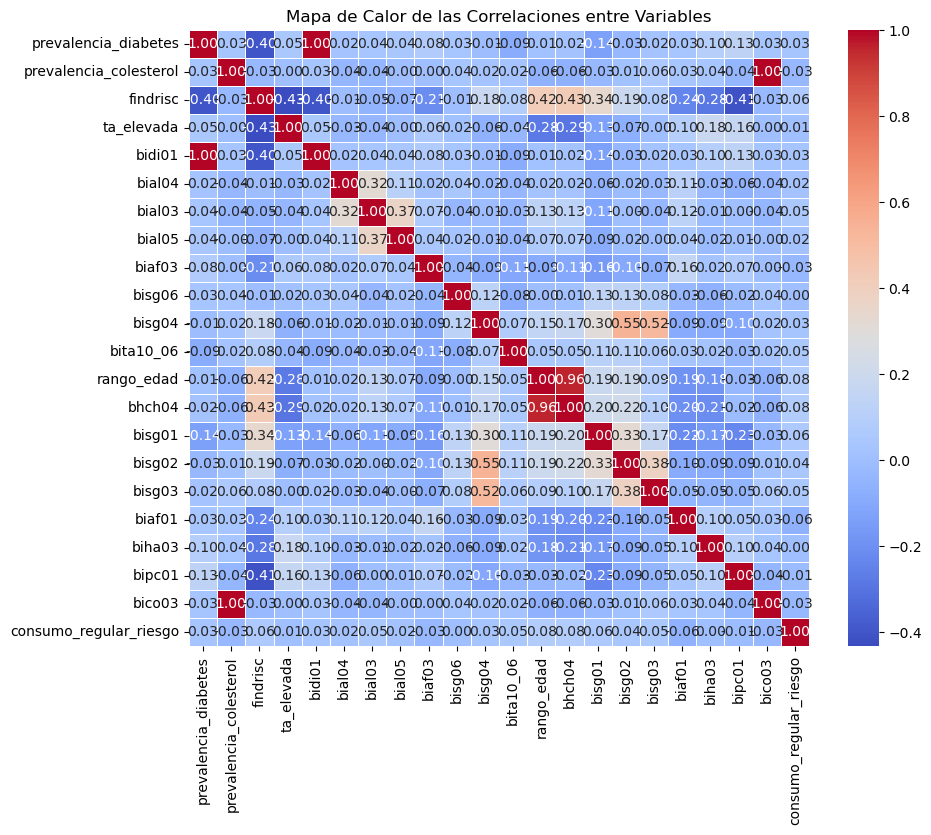

In [38]:
# Calcular la matriz de correlación
corr_matrix =filtrado_patagonia[variables_relevantes].corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Mapa de Calor de las Correlaciones entre Variables')
plt.show()

In [39]:
X = filtrado_patagonia

# Separar características (X) y la variable objetivo (y)
y = X['prevalencia_diabetes']
X = X.drop(columns=['prevalencia_diabetes'])

# Estandarice los datos utilizando MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Verifique la transformación
print(X_scaled.describe())

# Dividi los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

       prevalencia_colesterol     findrisc   ta_elevada       bidi01  \
count             1280.000000  1280.000000  1280.000000  1280.000000   
mean                 0.010993     0.377539     0.607812     0.880469   
std                  0.062135     0.290744     0.488429     0.324539   
min                  0.000000     0.000000     0.000000     0.000000   
25%                  0.000000     0.250000     0.000000     1.000000   
50%                  0.010204     0.250000     1.000000     1.000000   
75%                  0.010204     0.750000     1.000000     1.000000   
max                  1.000000     1.000000     1.000000     1.000000   

            bial04       bial03       bial05       biaf03       bisg06  \
count  1280.000000  1280.000000  1280.000000  1280.000000  1280.000000   
mean      0.080208     0.610807     0.688393     0.189844     0.076563   
std       0.109800     0.385179     0.301686     0.298831     0.202596   
min       0.000000     0.000000     0.000000     0.0000

In [40]:
# Función para entrenar y evaluar modelos
def entrenar_y_evaluar(modelo, X_train, X_test, y_train, y_test):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Modelo: {modelo.__class__.__name__}")
    print(f"Error cuadrático medio (MSE): {mse}")
    print(f"Coeficiente de determinación (R^2): {r2}")
    print("\n")

# Lista de modelos a probar
modelos = [
    LinearRegression(),
    DecisionTreeRegressor(),
    SVR(),
]

# Entrenar y evaluar cada modelo
for modelo in modelos:
    entrenar_y_evaluar(modelo, X_train, X_test, y_train, y_test)

Modelo: LinearRegression
Error cuadrático medio (MSE): 1.348568245892349e-30
Coeficiente de determinación (R^2): 1.0


Modelo: DecisionTreeRegressor
Error cuadrático medio (MSE): 0.0
Coeficiente de determinación (R^2): 1.0


Modelo: SVR
Error cuadrático medio (MSE): 0.005119718267134216
Coeficiente de determinación (R^2): 0.9505124105671228


